## Imports and constants

In [1]:
%matplotlib inline

import os
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import signal
import matplotlib.pyplot as plt

from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.analysis.fitter import Fitter
from onix.helpers import data_identifier, console_bold, present_float

In [2]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [3]:
name = "Free Induction Decay"
analysis_number = None
identifier = None

In [4]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

## Setup

In [156]:
data_numbers = [1701]
data, headers = get_experiment_data(data_numbers[0])
identifier = "data " + data_identifier(data_numbers)
times_us = data["times"] * 1e6
voltages = np.average(data["voltages"], axis=0)
sample_rate = 1e8
filtered_voltages = butter_highpass_filter(voltages, 1e7, sample_rate)
detuning = headers["params"]["probe"]["detuning"].to("Hz").magnitude
print(detuning)

14300000.0


## Overall plot

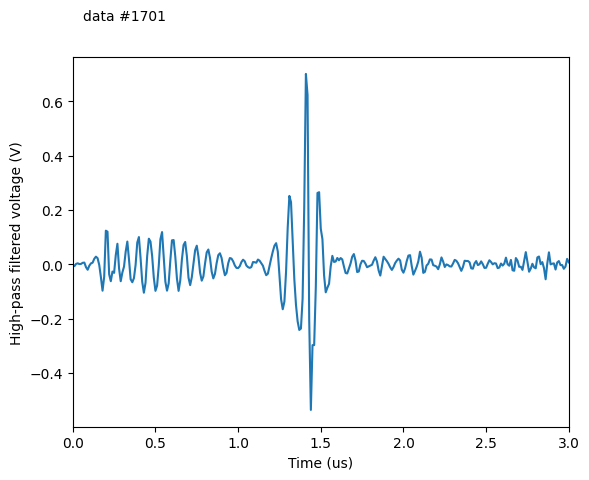

In [165]:
fig, ax = plt.subplots()
add_label(ax)
ax.errorbar(times_us, filtered_voltages)
ax.set_xlabel("Time (us)")
ax.set_ylabel("High-pass filtered voltage (V)")
ax.set_xlim(0, 3)
plt.show()

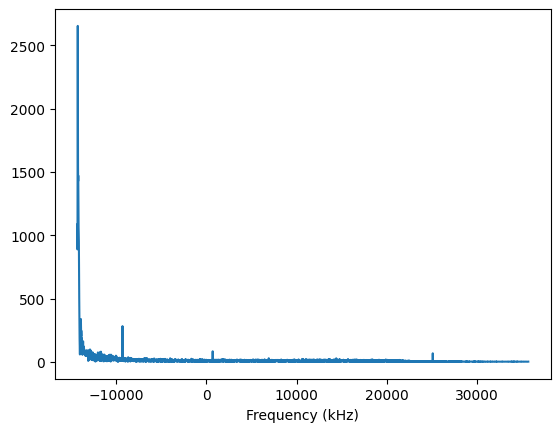

In [164]:
time_mask = np.bitwise_and(times_us > 2, times_us < 100)
spectrum = abs(np.fft.rfft(voltages[time_mask]))
freqs = (np.fft.rfftfreq(len(voltages[time_mask]), 1/sample_rate) - detuning) / 1e3

fig, ax = plt.subplots()
ax.plot(freqs, spectrum)
#ax.set_yscale("log")
#ax.set_xscale("log")
#ax.set_xlim(-1e3, 1e3)
#ax.set_xlim(-3.5e3, -3e3)
#ax.set_ylim(1, 150)
ax.set_xlabel("Frequency (kHz)")
plt.show()